In [1]:
import pandas as pd
import numpy as np
from math import *
from random import *
import datetime as datetime
import matplotlib.pyplot as plt
import math
from numpy import unravel_index
from PointProcess import PointProcessTrain
from PointProcess import PointProcessRun
from numpy import array

In [2]:
fields = ['XCOORD', 'YCOORD', 'CALL_TYPE_FINAL_D', 'CALL_TYPE_FINAL', 'DATE_TIME']
full_data = pd.read_csv('FixedLatLongTimeLoc_AndTimeSorted.csv', usecols=fields)
full_data['DATE_TIME'] =  pd.to_datetime(full_data['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')
full_data = full_data.sort_values(by='DATE_TIME')

In [18]:
end = len(full_data)- 10000
start = end-600000
data = full_data[start:end]
data.reset_index(drop=True, inplace=True)

# For use when model parameters are updated with weighted theta
#all_events = PointProcessTrain(data, xgridsize = 100, ygridsize = 100, w = [.003, .002, .001], update_with_trends = True) 

# For use when model parameters are updated *correctly*
all_events = PointProcessTrain(data, w = [.05, .01, .005]) 

#training_points = full_data[end:end+2200]

training_points = full_data[end:end+500]

training_points.reset_index(drop=True, inplace=True)
training_points.to_csv('TestTrainPoints.csv')
test_points = full_data[end+500:end+500+2000]
test_points.reset_index(drop=True, inplace=True)

#print(data.DATE_TIME[0], data.DATE_TIME[len(data)-1], training_points.DATE_TIME[0], training_points.DATE_TIME[len(training_points) - 1])
#print(data.DATE_TIME[0].weekday(), data.DATE_TIME[len(data)-1].weekday(), training_points.DATE_TIME[0].weekday(), training_points.DATE_TIME[len(training_points) - 1].weekday())


In [5]:
# load in data with correct column labels and format
fields = ['XCOORD', 'YCOORD', 'DATE_TIME']
full_data = pd.read_csv('FixedLatLongTimeLoc_AndTimeSorted.csv', usecols=fields)
full_data['DATE_TIME'] =  pd.to_datetime(full_data['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')
full_data = full_data.sort_values(by='DATE_TIME')

# initialize PointProcessTrain class. Can specify init values or leave as default
all_events = PointProcessTrain(data, w = [.05, .01, .005]) 

# train the parameters
import time
start = time.time()
all_events.train(progress_bar = True)
end = time.time()
print(start - end)


0.16666666666666669 percent trained

0.33333333333333337 percent trained

0.5 percent trained

0.6666666666666667 percent trained

0.8333333333333334 percent trained

1.0 percent trained

1.1666666666666667 percent trained

1.3333333333333335 percent trained

1.5 percent trained

1.6666666666666667 percent trained

1.8333333333333333 percent trained

2.0 percent trained

2.166666666666667 percent trained

2.3333333333333335 percent trained

2.5 percent trained

2.666666666666667 percent trained

2.833333333333333 percent trained

3.0 percent trained

3.166666666666667 percent trained

3.3333333333333335 percent trained

3.5000000000000004 percent trained

3.6666666666666665 percent trained

3.833333333333333 percent trained

4.0 percent trained

4.166666666666666 percent trained

4.333333333333334 percent trained

4.5 percent trained

4.666666666666667 percent trained

4.833333333333333 percent trained

5.0 percent trained

5.166666666666667 percent trained

5.333333333333334 percent t

43.5 percent trained

43.666666666666664 percent trained

43.833333333333336 percent trained

44.0 percent trained

44.166666666666664 percent trained

44.333333333333336 percent trained

44.5 percent trained

44.666666666666664 percent trained

44.83333333333333 percent trained

45.0 percent trained

45.166666666666664 percent trained

45.33333333333333 percent trained

45.5 percent trained

45.666666666666664 percent trained

45.83333333333333 percent trained

46.0 percent trained

46.166666666666664 percent trained

46.33333333333333 percent trained

46.5 percent trained

46.666666666666664 percent trained

46.833333333333336 percent trained

47.0 percent trained

47.16666666666667 percent trained

47.333333333333336 percent trained

47.5 percent trained

47.66666666666667 percent trained

47.833333333333336 percent trained

48.0 percent trained

48.16666666666667 percent trained

48.333333333333336 percent trained

48.5 percent trained

48.66666666666667 percent trained

48.8333333

87.33333333333333 percent trained

87.5 percent trained

87.66666666666667 percent trained

87.83333333333333 percent trained

88.0 percent trained

88.16666666666667 percent trained

88.33333333333333 percent trained

88.5 percent trained

88.66666666666667 percent trained

88.83333333333333 percent trained

89.0 percent trained

89.16666666666667 percent trained

89.33333333333333 percent trained

89.5 percent trained

89.66666666666666 percent trained

89.83333333333333 percent trained

90.0 percent trained

90.16666666666666 percent trained

90.33333333333333 percent trained

90.5 percent trained

90.66666666666666 percent trained

90.83333333333333 percent trained

91.0 percent trained

91.16666666666666 percent trained

91.33333333333333 percent trained

91.5 percent trained

91.66666666666666 percent trained

91.83333333333333 percent trained

92.0 percent trained

92.16666666666666 percent trained

92.33333333333333 percent trained

92.5 percent trained

92.66666666666666 perce

In [6]:
full_data.DATE_TIME[len(full_data)-1] - full_data.DATE_TIME[0]

Timedelta('3595 days 19:12:15')

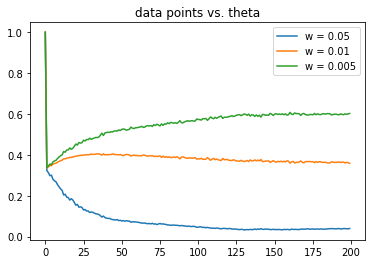


Hour vector: 
[0.0123684  0.00675913 0.00908814 0.00841652 0.00817007 0.00706097
 0.00556714 0.00645889 0.00767912 0.0073796  0.00584896 0.00789775
 0.00386457 0.00625603 0.0050589  0.00439636 0.00430528 0.0048959
 0.00517556 0.00493053 0.00395922 0.0041722  0.00823995 0.00428418
 0.00542545 0.00539053 0.00679002 0.00541223 0.0059344  0.00403839
 0.0086089  0.00767715 0.00978686 0.00954494 0.0129853  0.00922517
 0.00977547 0.01165426 0.00905576 0.01123397 0.01394858 0.01249125
 0.0132004  0.00953355 0.01088561 0.014009   0.01559771 0.01404596
 0.01034939 0.01322148 0.01367688 0.0150221  0.01308881 0.01188825
 0.01415315 0.012338   0.01407355 0.01389944 0.01264617 0.01177575
 0.01166091 0.01428618 0.01679862 0.01246639 0.0145171  0.01217322
 0.0152094  0.0128173  0.01312333 0.01568836 0.01509867 0.0141802
 0.01391088 0.01436182 0.01126253 0.01396603 0.01244584 0.01332519
 0.01261977 0.01318138 0.01007779 0.01094133 0.01460362 0.01048721
 0.01201495 0.01178888 0.01379518 0.01024156 0.01

In [9]:
all_events.param_examine()

In [10]:
all_events.model_hotspot_examine(500)

Location and value of largest and smallest sum(Lambda): 
14.936405121684523 (40, 46) 0.022212298914755964 (0, 0)

Location of grid with most events:
5.0 (40, 48)

Historical time period is 1.5403043762 days

Trained hotspots in real top 10
Grid: (40, 46), Model: 4.417258816949673, Real: 4
Grid: (40, 48), Model: 2.987231736804721, Real: 5

Trained hotstpots not in real top 10
Grid: (39, 46), Model: 2.6891468856100547, Real: 2
Grid: (38, 44), Model: 2.549194546335808, Real: 1
Grid: (38, 53), Model: 2.371178607926826, Real: 0
Grid: (38, 46), Model: 2.2042465030102703, Real: 1
Grid: (38, 45), Model: 2.173949593143358, Real: 3
Grid: (38, 47), Model: 2.051571865154057, Real: 3
Grid: (39, 64), Model: 1.9802963607564044, Real: 3
Grid: (64, 65), Model: 1.8314257462223793, Real: 0

Real top 10 hotspots not in trained model
Grid: (38, 65), Model: 0.9791254786522975, Real: 4
Grid: (40, 14), Model: 0.4420280831449162, Real: 4
Grid: (25, 52), Model: 0.8280669795571358, Real: 3
Grid: (27, 45), Model:

In [12]:
all_events_simulate = PointProcessRun(param_location = 'Trained_Params_100_100.npz', save_loc = 'PPtesting.npz')
points_to_run = test_points[0:300]
points_to_run.reset_index(drop = True, inplace = True)
all_events_simulate.test_projection(points_to_run, num_hotspots = 30, top_percent = 0)



Predicting over time of 1.0080925359 days. Generating 97 intensity prediction(s)
29.0

The predictive accuracy index for 30 hotspots is: 32.22222222222222. 
Hit number/Tot number: 0.09666666666666666. Hit area/Tot area: 0.003

The predicted number of events is: 303.40666752555103

Predicted hotspots in real top 30
Grid: (40, 46), Model: 2.3651852797896122, Real: 3.0
Grid: (38, 44), Model: 1.3540993733042321, Real: 5.0
Grid: (38, 45), Model: 1.1692460215956875, Real: 2.0
Grid: (38, 47), Model: 1.110697802514896, Real: 3.0
Grid: (42, 41), Model: 0.7087171352399577, Real: 2.0
Grid: (10, 66), Model: 0.7010655858981778, Real: 2.0

Predicted hotstpots not in real top 30
Grid: (40, 48), Model: 1.6071048551719052, Real: 1.0
Grid: (39, 46), Model: 1.433685537718783, Real: 1.0
Grid: (38, 53), Model: 1.2577961458954718, Real: 0.0
Grid: (38, 46), Model: 1.1766911420674222, Real: 0.0
Grid: (39, 64), Model: 1.0700778241329818, Real: 0.0
Grid: (48, 50), Model: 0.9678419575432512, Real: 1.0
Grid: (64

(array([[[ 2.55245467e-07,  2.55245467e-07,  2.55245467e-07, ...,
           2.55245467e-07,  2.55245467e-07, -1.27210882e-07],
         [ 2.55245467e-07,  2.55245467e-07,  2.55245467e-07, ...,
           2.55245467e-07,  2.55245467e-07,  2.55245467e-07],
         [ 2.55245467e-07,  2.55245467e-07,  2.55245467e-07, ...,
           2.55245467e-07,  2.55245467e-07,  2.55245467e-07],
         ...,
         [ 2.55245467e-07,  2.55245467e-07,  2.55245467e-07, ...,
           2.55245467e-07,  2.55245467e-07,  2.55245467e-07],
         [ 2.55245467e-07,  2.55245467e-07,  2.55245467e-07, ...,
           2.55245467e-07,  2.55245467e-07,  2.55245467e-07],
         [ 2.55245467e-07,  2.55245467e-07,  2.55245467e-07, ...,
           2.55245467e-07,  2.55245467e-07,  2.55245467e-07]],
 
        [[ 2.50442996e-07,  2.50442996e-07,  2.50442996e-07, ...,
           2.50442996e-07,  2.50442996e-07, -1.24817395e-07],
         [ 2.50442996e-07,  2.50442996e-07,  2.50442996e-07, ...,
           2.50442996

In [16]:
# get a array([10, _xsize, _ysize]) of intensities:
all_events_simulate.get_future_events(timestamp, 10, top_percent = 0)

# get intensities in API friendly format:
all_events_simulate.get_events_for_api(timestamp, 10, top_percent = 0)

([[[39.6277, -86.3283, 1.6849001335009798e-07],
   [39.6307303030303, -86.3283, 1.6849001335009798e-07],
   [39.633760606060605, -86.3283, 1.6849001335009798e-07],
   [39.636790909090905, -86.3283, 1.6849001335009798e-07],
   [39.63982121212121, -86.3283, 1.6849001335009798e-07],
   [39.64285151515151, -86.3283, 1.6849001335009798e-07],
   [39.64588181818181, -86.3283, 1.6849001335009798e-07],
   [39.64891212121212, -86.3283, 1.6849001335009798e-07],
   [39.65194242424242, -86.3283, 1.6849001335009798e-07],
   [39.65497272727273, -86.3283, 1.6849001335009798e-07],
   [39.65800303030303, -86.3283, 1.6849001335009798e-07],
   [39.66103333333333, -86.3283, 1.6849001335009798e-07],
   [39.664063636363636, -86.3283, 1.6849001335009798e-07],
   [39.667093939393936, -86.3283, 1.6849001335009798e-07],
   [39.670124242424244, -86.3283, 1.6849001335009798e-07],
   [39.673154545454544, -86.3283, 1.6849001335009798e-07],
   [39.676184848484844, -86.3283, 1.6849001335009798e-07],
   [39.67921515151

In [14]:
timestamp = all_events_simulate._LastTime

In [12]:
all_events_simulate.update_from_new_inputs('TestTrainPoints.csv')

'Parameters updated: 500 used for update ranging from: 2016-09-29 00:54:49 to 2016-09-30 21:01:17.'

In [13]:
all_events_simulate._LastTime

Timestamp('2016-09-30 21:01:17')

In [15]:
points_to_run = test_points[0:20]
points_to_run.reset_index(drop = True, inplace = True)
all_events_simulate.test_projection(points_to_run, num_hotspots = 30, top_percent = 0)


Predicting over time of 0.0710302517 days. Generating 7 intensity prediction(s)
4.0

The predictive accuracy index for 30 hotspots is: 66.66666666666667. 
Hit number/Tot number: 0.2. Hit area/Tot area: 0.003

The predicted number of events is: 25.087763803869066

Predicted hotspots in real top 30
Grid: (40, 46), Model: 0.19913574530717065, Real: 1.0
Grid: (38, 44), Model: 0.11109412863609515, Real: 2.0
Grid: (39, 47), Model: 0.06504402932306969, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (40, 48), Model: 0.13165195476695132, Real: 0.0
Grid: (39, 46), Model: 0.12179354672311563, Real: 0.0
Grid: (38, 53), Model: 0.10388493693523536, Real: 0.0
Grid: (38, 45), Model: 0.09744592628416188, Real: 0.0
Grid: (38, 46), Model: 0.09658830814762048, Real: 0.0
Grid: (38, 47), Model: 0.09190718889765186, Real: 0.0
Grid: (39, 64), Model: 0.08934727352174925, Real: 0.0
Grid: (64, 65), Model: 0.08099369133544525, Real: 0.0
Grid: (48, 50), Model: 0.07955805682598749, Real: 0.0
Grid: (41, 46

(array([[[ 2.67726002e-07,  2.67726002e-07,  2.67726002e-07, ...,
           2.67726002e-07,  2.67726002e-07, -1.33759880e-07],
         [ 2.67726002e-07,  2.67726002e-07,  2.67726002e-07, ...,
           2.67726002e-07,  2.67726002e-07,  2.67726002e-07],
         [ 2.67726002e-07,  2.67726002e-07,  2.67726002e-07, ...,
           2.67726002e-07,  2.67726002e-07,  2.67726002e-07],
         ...,
         [ 2.67726002e-07,  2.67726002e-07,  2.67726002e-07, ...,
           2.67726002e-07,  2.67726002e-07,  2.67726002e-07],
         [ 2.67726002e-07,  2.67726002e-07,  2.67726002e-07, ...,
           2.67726002e-07,  2.67726002e-07,  2.67726002e-07],
         [ 2.67726002e-07,  2.67726002e-07,  2.67726002e-07, ...,
           2.67726002e-07,  2.67726002e-07,  2.67726002e-07]],
 
        [[ 2.62019871e-07,  2.62019871e-07,  2.62019871e-07, ...,
           2.62019871e-07,  2.62019871e-07, -1.30909012e-07],
         [ 2.62019871e-07,  2.62019871e-07,  2.62019871e-07, ...,
           2.62019871

In [ ]:
# Get intensities in Wasserstein-friendly format. Wasserstein works best when only top intensities are used
wasserstein_locs = all_events_simulate.locs_for_wasserstein(all_events_simulate._LastTime, 10, top_percent = 96)


In [ ]:
for i in range(0, len(wasserstein_locs)):
    plt.plot(wasserstein_locs[i][1], wasserstein_locs[i][0], '.')
plt.show()

#### Lets get results

In [39]:
simulation = PointProcessRun(param_location = 'Trained_Params_100_100.npz', save_loc = 'PPtesting.npz')
simulation._LastTime

Timestamp('2016-09-29 00:49:24')

In [40]:
last_t = simulation._LastTime
indices = []
for i in range(end, len(full_data)-1):
    if (full_data.DATE_TIME[i] - last_t).total_seconds() > 3600: # 1 hour in seconds
        last_t = full_data.DATE_TIME[i]
        indices.append(i)
        
pred_num_1h = []
real_num_1h = []
pai_1h = []
for i in range(0, 20):
    test_points = full_data[indices[i]:indices[i+1]]
    test_points.reset_index(drop=True, inplace=True)
    ig, ig, pred, ig, real, ig, pai = simulation.test_projection(test_points, num_hotspots=30, top_percent=0)
    pred_num_1h.append(sum(sum(pred)))
    real_num_1h.append(sum(sum(real)))
    pai_1h.append(pai)
    test_points.to_csv('for_results.csv')
    simulation.update_from_new_inputs('for_results.csv')


Predicting over time of 0.0357292467 days. Generating 4 intensity prediction(s)
1.0

The predictive accuracy index for 30 hotspots is: 55.55555555555555. 
Hit number/Tot number: 0.16666666666666666. Hit area/Tot area: 0.003

The predicted number of events is: 7.870533704837396

Predicted hotspots in real top 30
Grid: (64, 65), Model: 0.02509683765500107, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (40, 46), Model: 0.06135419044870436, Real: 0.0
Grid: (40, 48), Model: 0.0416891725979393, Real: 0.0
Grid: (39, 46), Model: 0.03719058133685653, Real: 0.0
Grid: (38, 44), Model: 0.035126073016812115, Real: 0.0
Grid: (38, 53), Model: 0.032627915005365514, Real: 0.0
Grid: (38, 46), Model: 0.030524007166208105, Real: 0.0
Grid: (38, 45), Model: 0.030330876698485536, Real: 0.0
Grid: (38, 47), Model: 0.0288121041039618, Real: 0.0
Grid: (39, 64), Model: 0.02775839980816648, Real: 0.0
Grid: (48, 50), Model: 0.025106345914954097, Real: 0.0
Grid: (41, 46), Model: 0.02373766364617686, Real:


Predicting over time of 0.0404167572 days. Generating 4 intensity prediction(s)
1.0

The predictive accuracy index for 30 hotspots is: 27.777777777777775. 
Hit number/Tot number: 0.08333333333333333. Hit area/Tot area: 0.003

The predicted number of events is: 14.516049493098519

Predicted hotspots in real top 30
Grid: (39, 46), Model: 0.068438231500733, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (40, 46), Model: 0.11290766938972134, Real: 0.0
Grid: (40, 48), Model: 0.07671664333458963, Real: 0.0
Grid: (38, 44), Model: 0.06464926043105804, Real: 0.0
Grid: (38, 53), Model: 0.06045939511080249, Real: 0.0
Grid: (38, 46), Model: 0.0565902006920879, Real: 0.0
Grid: (38, 45), Model: 0.05581831464293882, Real: 0.0
Grid: (38, 47), Model: 0.05302144646267608, Real: 0.0
Grid: (39, 64), Model: 0.051499774029270154, Real: 0.0
Grid: (64, 65), Model: 0.04744260902970431, Real: 0.0
Grid: (48, 50), Model: 0.04620060357491314, Real: 0.0
Grid: (41, 46), Model: 0.04369173998197883, Real: 0.


Predicting over time of 0.041562593099999996 days. Generating 4 intensity prediction(s)
0.0

The predictive accuracy index for 30 hotspots is: 0.0. 
Hit number/Tot number: 0.0. Hit area/Tot area: 0.003

The predicted number of events is: 17.251710218994045

Predicted hotspots in real top 30

Predicted hotstpots not in real top 30
Grid: (40, 46), Model: 0.13382422860173374, Real: 0.0
Grid: (40, 48), Model: 0.0909268810869466, Real: 0.0
Grid: (39, 46), Model: 0.08210183527324662, Real: 0.0
Grid: (38, 44), Model: 0.07663219070003247, Real: 0.0
Grid: (38, 53), Model: 0.07215299211871934, Real: 0.0
Grid: (38, 46), Model: 0.06707330894721224, Real: 0.0
Grid: (38, 45), Model: 0.0661601206789012, Real: 0.0
Grid: (38, 47), Model: 0.06334209975132227, Real: 0.0
Grid: (39, 64), Model: 0.06104025764828598, Real: 0.0
Grid: (64, 65), Model: 0.05623366302465517, Real: 0.0
Grid: (48, 50), Model: 0.054758162668004595, Real: 0.0
Grid: (58, 52), Model: 0.051828576410807535, Real: 0.0
Grid: (41, 46), Mod

In [41]:
pred_num_1h, real_num_1h, pai_1h, np.mean(pred_num_1h), np.mean(real_num_1h), np.mean(pai_1h)

([7.870533704837396,
  4.3672911965304975,
  5.558042014426221,
  4.808285857430875,
  6.914646827356669,
  11.683395105604934,
  11.469172985639556,
  14.881570425740447,
  14.516049493098519,
  15.510001236567293,
  14.985237538361051,
  15.280042014468133,
  20.52048212022429,
  15.601577221965448,
  17.251710218994045,
  15.419550705070039,
  13.742590857960778,
  14.368604789061829,
  14.167263940659748,
  14.361500917154041],
 [6.0,
  5.0,
  5.0,
  6.0,
  9.0,
  9.0,
  19.0,
  15.0,
  12.0,
  17.0,
  15.0,
  14.0,
  18.0,
  16.0,
  11.0,
  12.0,
  16.0,
  11.0,
  9.0,
  9.0],
 [55.55555555555555,
  0.0,
  0.0,
  0.0,
  0.0,
  37.03703703703703,
  35.08771929824561,
  88.88888888888889,
  27.777777777777775,
  39.2156862745098,
  22.22222222222222,
  23.809523809523807,
  18.518518518518515,
  20.833333333333332,
  0.0,
  27.777777777777775,
  41.666666666666664,
  0.0,
  74.07407407407406,
  37.03703703703703],
 12.66387745855759,
 11.7,
 27.475090913558404)

In [43]:
simulation = PointProcessRun(param_location = 'Trained_Params_100_100.npz', save_loc = 'PPtesting.npz')
simulation._LastTime

Timestamp('2016-09-29 00:49:24')

In [44]:
last_t = simulation._LastTime
indices = []
for i in range(end, len(full_data)-1):
    if (full_data.DATE_TIME[i] - last_t).total_seconds() > 3600*2: # 2 hours in seconds
        last_t = full_data.DATE_TIME[i]
        indices.append(i)
        
pred_num_2h = []
real_num_2h = []
pai_2h = []
for i in range(0, 20):
    test_points = full_data[indices[i]:indices[i+1]]
    test_points.reset_index(drop=True, inplace=True)
    ig, ig, pred, ig, real, ig, pai = simulation.test_projection(test_points, num_hotspots=30, top_percent=0)
    pred_num_2h.append(sum(sum(pred)))
    real_num_2h.append(sum(sum(real)))
    pai_2h.append(pai)
    test_points.to_csv('for_results.csv')
    simulation.update_from_new_inputs('for_results.csv')


Predicting over time of 0.0817710165 days. Generating 8 intensity prediction(s)
0.0

The predictive accuracy index for 30 hotspots is: 0.0. 
Hit number/Tot number: 0.0. Hit area/Tot area: 0.003

The predicted number of events is: 11.182659076952838

Predicted hotspots in real top 30

Predicted hotstpots not in real top 30
Grid: (40, 46), Model: 0.08717363020866098, Real: 0.0
Grid: (40, 48), Model: 0.05923306116794418, Real: 0.0
Grid: (39, 46), Model: 0.05284134565209184, Real: 0.0
Grid: (38, 44), Model: 0.0499080385130347, Real: 0.0
Grid: (38, 53), Model: 0.046358590608987775, Real: 0.0
Grid: (38, 46), Model: 0.04336930360801025, Real: 0.0
Grid: (38, 45), Model: 0.043094898814268444, Real: 0.0
Grid: (38, 47), Model: 0.0409369871939244, Real: 0.0
Grid: (39, 64), Model: 0.03943985671336276, Real: 0.0
Grid: (48, 50), Model: 0.03567174953617454, Real: 0.0
Grid: (64, 65), Model: 0.035658239953030975, Real: 0.0
Grid: (41, 46), Model: 0.03372709015596007, Real: 0.0
Grid: (58, 52), Model: 0.0


Predicting over time of 0.0767478571 days. Generating 8 intensity prediction(s)
1.0

The predictive accuracy index for 30 hotspots is: 12.345679012345679. 
Hit number/Tot number: 0.037037037037037035. Hit area/Tot area: 0.003

The predicted number of events is: 33.42523847417332

Predicted hotspots in real top 30
Grid: (38, 47), Model: 0.12186342831143396, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (40, 46), Model: 0.25950550135789496, Real: 0.0
Grid: (40, 48), Model: 0.17632192776811612, Real: 0.0
Grid: (39, 46), Model: 0.15920792480991425, Real: 0.0
Grid: (38, 44), Model: 0.1485982610859174, Real: 0.0
Grid: (38, 53), Model: 0.1399156632878835, Real: 0.0
Grid: (38, 46), Model: 0.1300642830684208, Real: 0.0
Grid: (38, 45), Model: 0.12829389602802896, Real: 0.0
Grid: (39, 64), Model: 0.118365634670513, Real: 0.0
Grid: (64, 65), Model: 0.10808755647056303, Real: 0.0
Grid: (48, 50), Model: 0.10618502711265451, Real: 0.0
Grid: (58, 52), Model: 0.10050260170002748, Real: 0.0
G

2.0

The predictive accuracy index for 30 hotspots is: 47.61904761904761. 
Hit number/Tot number: 0.14285714285714285. Hit area/Tot area: 0.003

The predicted number of events is: 13.529959397172567

Predicted hotspots in real top 30
Grid: (40, 46), Model: 0.10547571073695682, Real: 1.0
Grid: (10, 66), Model: 0.031795054847557395, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (40, 48), Model: 0.07113584767891194, Real: 0.0
Grid: (39, 46), Model: 0.06461519373152284, Real: 0.0
Grid: (38, 44), Model: 0.059960522378415544, Real: 0.0
Grid: (38, 53), Model: 0.05644539967597252, Real: 0.0
Grid: (38, 46), Model: 0.05247460969647342, Real: 0.0
Grid: (38, 45), Model: 0.05176237321183204, Real: 0.0
Grid: (38, 47), Model: 0.049554276672106885, Real: 0.0
Grid: (39, 64), Model: 0.047755213297014903, Real: 0.0
Grid: (64, 65), Model: 0.04361288561516421, Real: 0.0
Grid: (48, 50), Model: 0.043227942797314726, Real: 0.0
Grid: (41, 46), Model: 0.04130205046959024, Real: 0.0
Grid: (58, 52), Mod


Predicting over time of 0.0808566626 days. Generating 8 intensity prediction(s)
5.0

The predictive accuracy index for 30 hotspots is: 50.505050505050505. 
Hit number/Tot number: 0.15151515151515152. Hit area/Tot area: 0.003

The predicted number of events is: 33.20620582700938

Predicted hotspots in real top 30
Grid: (39, 46), Model: 0.16082187749755775, Real: 1.0
Grid: (39, 64), Model: 0.11675232235554533, Real: 1.0
Grid: (58, 52), Model: 0.09913250242363161, Real: 1.0
Grid: (10, 66), Model: 0.07865853121609956, Real: 1.0
Grid: (45, 53), Model: 0.06771114142684874, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (40, 46), Model: 0.262622347396074, Real: 0.0
Grid: (40, 48), Model: 0.1739073362527822, Real: 0.0
Grid: (38, 44), Model: 0.14661435460938765, Real: 0.0
Grid: (38, 53), Model: 0.13798580298907598, Real: 0.0
Grid: (38, 46), Model: 0.12828889199747567, Real: 0.0
Grid: (38, 45), Model: 0.12655345702384538, Real: 0.0
Grid: (38, 47), Model: 0.12114457472662896, Real: 0.0


In [45]:
pred_num_2h, real_num_2h, pai_2h, np.mean(pred_num_2h), np.mean(real_num_2h), np.mean(pai_2h)

([11.182659076952838,
  13.131919425000259,
  22.829905264640917,
  27.266172566649864,
  31.006760208698545,
  30.992915502916812,
  33.42523847417332,
  31.0696841568081,
  28.753988727083907,
  27.069893892593424,
  16.952883699028277,
  13.529959397172567,
  11.9780603517159,
  16.18747223387835,
  27.738447219291103,
  30.32081629230406,
  29.385765763073703,
  33.20620582700938,
  34.34945451108696,
  30.435854351016513],
 [10.0,
  12.0,
  23.0,
  29.0,
  33.0,
  30.0,
  27.0,
  24.0,
  23.0,
  19.0,
  18.0,
  14.0,
  15.0,
  19.0,
  33.0,
  31.0,
  20.0,
  33.0,
  37.0,
  26.0],
 [0.0,
  0.0,
  28.98550724637681,
  57.4712643678161,
  40.4040404040404,
  22.22222222222222,
  12.345679012345679,
  27.777777777777775,
  14.492753623188404,
  52.63157894736842,
  55.55555555555555,
  47.61904761904761,
  0.0,
  35.08771929824561,
  10.1010101010101,
  53.76344086021505,
  16.666666666666668,
  50.505050505050505,
  45.04504504504504,
  25.641025641025642],
 25.04070284705474,
 23.8

In [ ]:
simulation = PointProcessRun(param_location = 'Trained_Params_100_100.npz', save_loc = 'PPtesting.npz')
simulation._LastTime

In [46]:
last_t = simulation._LastTime
indices = []
for i in range(end, len(full_data)-1):
    if (full_data.DATE_TIME[i] - last_t).total_seconds() > 3600*4: # 4 hours in seconds
        last_t = full_data.DATE_TIME[i]
        indices.append(i)
        
pred_num_4h = []
real_num_4h = []
pai_4h = []
for i in range(0, 20):
    test_points = full_data[indices[i]:indices[i+1]]
    test_points.reset_index(drop=True, inplace=True)
    ig, ig, pred, ig, real, ig, pai = simulation.test_projection(test_points, num_hotspots=30, top_percent=0)
    pred_num_4h.append(sum(sum(pred)))
    real_num_4h.append(sum(sum(real)))
    pai_4h.append(pai)
    test_points.to_csv('for_results.csv')
    simulation.update_from_new_inputs('for_results.csv')


Predicting over time of 0.1653128703 days. Generating 16 intensity prediction(s)
2.0

The predictive accuracy index for 30 hotspots is: 17.094017094017094. 
Hit number/Tot number: 0.05128205128205128. Hit area/Tot area: 0.003

The predicted number of events is: 27.770432406282623

Predicted hotspots in real top 30
Grid: (48, 50), Model: 0.08812568793218677, Real: 1.0
Grid: (42, 41), Model: 0.064828330690474, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (40, 46), Model: 0.2198017461470522, Real: 0.0
Grid: (40, 48), Model: 0.1458300302605196, Real: 0.0
Grid: (39, 46), Model: 0.1349061722719996, Real: 0.0
Grid: (38, 44), Model: 0.12228242901055603, Real: 0.0
Grid: (38, 53), Model: 0.1150716619590816, Real: 0.0
Grid: (38, 45), Model: 0.1079393538736093, Real: 0.0
Grid: (38, 46), Model: 0.10698929129517531, Real: 0.0
Grid: (38, 47), Model: 0.1010291332538597, Real: 0.0
Grid: (39, 64), Model: 0.09896821280759548, Real: 0.0
Grid: (64, 65), Model: 0.08893877234504895, Real: 0.0
Gri


Predicting over time of 0.159143875 days. Generating 16 intensity prediction(s)
6.0

The predictive accuracy index for 30 hotspots is: 43.47826086956522. 
Hit number/Tot number: 0.13043478260869565. Hit area/Tot area: 0.003

The predicted number of events is: 43.59951476263818

Predicted hotspots in real top 30
Grid: (40, 48), Model: 0.22855265746435224, Real: 1.0
Grid: (38, 44), Model: 0.19316359167499417, Real: 2.0
Grid: (48, 50), Model: 0.1385995710017577, Real: 1.0
Grid: (49, 48), Model: 0.11324427541259632, Real: 1.0
Grid: (39, 50), Model: 0.1111953505403626, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (40, 46), Model: 0.34502971655716796, Real: 0.0
Grid: (39, 46), Model: 0.21143786819639693, Real: 0.0
Grid: (38, 53), Model: 0.17936066528064587, Real: 0.0
Grid: (38, 45), Model: 0.170722188740215, Real: 0.0
Grid: (38, 46), Model: 0.166787688677909, Real: 0.0
Grid: (38, 47), Model: 0.16119573988051789, Real: 0.0
Grid: (39, 64), Model: 0.15425928626279653, Real: 0.0
Grid

3.0

The predictive accuracy index for 30 hotspots is: 21.27659574468085. 
Hit number/Tot number: 0.06382978723404255. Hit area/Tot area: 0.003

The predicted number of events is: 62.508299432841504

Predicted hotspots in real top 30
Grid: (38, 46), Model: 0.2415165821926882, Real: 1.0
Grid: (47, 4), Model: 0.15757362584349935, Real: 1.0
Grid: (44, 46), Model: 0.1441966559807439, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (40, 46), Model: 0.4921854920944209, Real: 0.0
Grid: (40, 48), Model: 0.3278274618137659, Real: 0.0
Grid: (39, 46), Model: 0.30158060101065315, Real: 0.0
Grid: (38, 44), Model: 0.28624115972461106, Real: 0.0
Grid: (38, 53), Model: 0.2558935186992939, Real: 0.0
Grid: (38, 45), Model: 0.24530852473638193, Real: 0.0
Grid: (38, 47), Model: 0.229951818645623, Real: 0.0
Grid: (39, 64), Model: 0.2200805797626598, Real: 0.0
Grid: (64, 65), Model: 0.20319594607030741, Real: 0.0
Grid: (48, 50), Model: 0.2012476608788681, Real: 0.0
Grid: (41, 46), Model: 0.189182574


Predicting over time of 0.1665165767 days. Generating 16 intensity prediction(s)
8.0

The predictive accuracy index for 30 hotspots is: 30.65134099616858. 
Hit number/Tot number: 0.09195402298850575. Hit area/Tot area: 0.003

The predicted number of events is: 58.66540328708173

Predicted hotspots in real top 30
Grid: (38, 53), Model: 0.24202570807322976, Real: 1.0
Grid: (38, 47), Model: 0.21611380610856015, Real: 1.0
Grid: (39, 64), Model: 0.20526116128310323, Real: 1.0
Grid: (39, 50), Model: 0.14956911026114963, Real: 1.0
Grid: (39, 47), Model: 0.14950958407779863, Real: 2.0
Grid: (10, 66), Model: 0.14741347795140194, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (40, 46), Model: 0.46066257922152387, Real: 0.0
Grid: (40, 48), Model: 0.3074106300041825, Real: 0.0
Grid: (39, 46), Model: 0.2811831335016682, Real: 0.0
Grid: (38, 44), Model: 0.2686106457575826, Real: 0.0
Grid: (38, 45), Model: 0.2287457048590583, Real: 0.0
Grid: (38, 46), Model: 0.2285913974276838, Real: 0.0
Gr


Predicting over time of 0.1664471321 days. Generating 16 intensity prediction(s)
2.0

The predictive accuracy index for 30 hotspots is: 31.746031746031743. 
Hit number/Tot number: 0.09523809523809523. Hit area/Tot area: 0.003

The predicted number of events is: 24.959915763972532

Predicted hotspots in real top 30
Grid: (39, 46), Model: 0.11941110785651979, Real: 1.0
Grid: (38, 46), Model: 0.0965130632565337, Real: 1.0

Predicted hotstpots not in real top 30
Grid: (40, 46), Model: 0.19590999858178668, Real: 0.0
Grid: (40, 48), Model: 0.12979529048621766, Real: 0.0
Grid: (38, 44), Model: 0.1134102362594684, Real: 0.0
Grid: (38, 53), Model: 0.1028997729856719, Real: 0.0
Grid: (38, 45), Model: 0.0965746582631382, Real: 0.0
Grid: (38, 47), Model: 0.09337560549215146, Real: 0.0
Grid: (39, 64), Model: 0.08810399537641031, Real: 0.0
Grid: (64, 65), Model: 0.08074340952890964, Real: 0.0
Grid: (48, 50), Model: 0.08063459231267768, Real: 0.0
Grid: (41, 46), Model: 0.07595356736741658, Real: 0.0

In [47]:
pred_num_4h, real_num_4h, pai_4h, np.mean(pred_num_4h), np.mean(real_num_4h), np.mean(pai_4h)

([27.770432406282623,
  31.897270745639524,
  59.00896784685427,
  63.81172806094998,
  61.35193368946821,
  43.59951476263818,
  26.739388834281982,
  31.790911952021478,
  58.846834480149234,
  62.508299432841504,
  57.78831667142044,
  43.132573443233476,
  27.26417431528408,
  36.37795433164681,
  58.66540328708173,
  63.56569653557432,
  59.5966430810252,
  41.09684572514883,
  24.959915763972532,
  42.56265992281556],
 [39.0,
  28.0,
  56.0,
  64.0,
  59.0,
  46.0,
  46.0,
  30.0,
  48.0,
  47.0,
  58.0,
  45.0,
  26.0,
  40.0,
  87.0,
  71.0,
  66.0,
  40.0,
  21.0,
  46.0],
 [17.094017094017094,
  23.809523809523807,
  23.809523809523807,
  31.25,
  45.197740112994346,
  43.47826086956522,
  79.71014492753623,
  11.11111111111111,
  6.944444444444444,
  21.27659574468085,
  28.73563218390805,
  22.22222222222222,
  12.820512820512821,
  25.0,
  30.65134099616858,
  28.16901408450704,
  35.35353535353536,
  8.333333333333334,
  31.746031746031743,
  28.98550724637681],
 46.11677

In [49]:
simulation = PointProcessRun(param_location = 'Trained_Params_100_100.npz', save_loc = 'PPtesting.npz')
simulation._LastTime

Timestamp('2016-09-29 00:49:24')

In [50]:
last_t = simulation._LastTime
indices = []
for i in range(end, len(full_data)-1):
    if (full_data.DATE_TIME[i] - last_t).total_seconds() > 3600*24: # 24 hours in seconds
        last_t = full_data.DATE_TIME[i]
        indices.append(i)
        
pred_num_24h = []
real_num_24h = []
pai_24h = []
for i in range(0, 20):
    test_points = full_data[indices[i]:indices[i+1]]
    test_points.reset_index(drop=True, inplace=True)
    ig, ig, pred, ig, real, ig, pai = simulation.test_projection(test_points, num_hotspots=30, top_percent=0)
    pred_num_24h.append(sum(sum(pred)))
    real_num_24h.append(sum(sum(real)))
    pai_24h.append(pai)
    test_points.to_csv('for_results.csv')
    simulation.update_from_new_inputs('for_results.csv')


Predicting over time of 0.9974675121 days. Generating 96 intensity prediction(s)
32.0

The predictive accuracy index for 30 hotspots is: 35.79418344519016. 
Hit number/Tot number: 0.10738255033557047. Hit area/Tot area: 0.003

The predicted number of events is: 305.0201806692506

Predicted hotspots in real top 30
Grid: (40, 46), Model: 2.3777633077128226, Real: 8.0
Grid: (39, 46), Model: 1.4413098608027384, Real: 5.0
Grid: (38, 44), Model: 1.3613004580876367, Real: 3.0
Grid: (38, 45), Model: 1.175464058395766, Real: 3.0
Grid: (39, 64), Model: 1.0757684856075673, Real: 2.0
Grid: (10, 66), Model: 0.7047938445639069, Real: 3.0

Predicted hotstpots not in real top 30
Grid: (40, 48), Model: 1.6156514201774503, Real: 1.0
Grid: (38, 53), Model: 1.264485091230946, Real: 0.0
Grid: (38, 46), Model: 1.1829487719319356, Real: 0.0
Grid: (38, 47), Model: 1.1166044805640356, Real: 0.0
Grid: (48, 50), Model: 0.972988929863457, Real: 0.0
Grid: (64, 65), Model: 0.9726204400916718, Real: 0.0
Grid: (41, 


Predicting over time of 0.9896318464 days. Generating 96 intensity prediction(s)
27.0

The predictive accuracy index for 30 hotspots is: 27.35562310030395. 
Hit number/Tot number: 0.08206686930091185. Hit area/Tot area: 0.003

The predicted number of events is: 288.51580003722984

Predicted hotspots in real top 30
Grid: (40, 46), Model: 2.2733656304702987, Real: 3.0
Grid: (38, 53), Model: 1.1745772871175395, Real: 2.0
Grid: (38, 47), Model: 1.0622993123847417, Real: 3.0
Grid: (39, 64), Model: 1.008753542656601, Real: 2.0
Grid: (41, 46), Model: 0.8581702683443344, Real: 2.0
Grid: (49, 48), Model: 0.7631449077819467, Real: 2.0
Grid: (39, 47), Model: 0.7483798062295592, Real: 2.0
Grid: (39, 50), Model: 0.7406727539374945, Real: 2.0
Grid: (10, 66), Model: 0.697767401468815, Real: 3.0

Predicted hotstpots not in real top 30
Grid: (40, 48), Model: 1.5223179659512525, Real: 0.0
Grid: (39, 46), Model: 1.3771392234582127, Real: 1.0
Grid: (38, 44), Model: 1.3539831988714928, Real: 0.0
Grid: (38


Predicting over time of 0.9970508445 days. Generating 96 intensity prediction(s)
40.0

The predictive accuracy index for 30 hotspots is: 35.746201966041106. 
Hit number/Tot number: 0.10723860589812333. Hit area/Tot area: 0.003

The predicted number of events is: 245.18597581791676

Predicted hotspots in real top 30
Grid: (40, 46), Model: 1.9174182863347138, Real: 6.0
Grid: (39, 46), Model: 1.184139925559027, Real: 4.0
Grid: (38, 53), Model: 1.0312908210660683, Real: 2.0
Grid: (64, 65), Model: 0.7833137412711386, Real: 3.0
Grid: (38, 49), Model: 0.6997682575348024, Real: 3.0
Grid: (49, 48), Model: 0.6518915319286316, Real: 6.0
Grid: (47, 4), Model: 0.6292499448467315, Real: 3.0
Grid: (37, 45), Model: 0.5010691028885125, Real: 3.0

Predicted hotstpots not in real top 30
Grid: (40, 48), Model: 1.2641470922011324, Real: 1.0
Grid: (38, 44), Model: 1.1381084821145506, Real: 1.0
Grid: (38, 45), Model: 0.9557434017813681, Real: 1.0
Grid: (38, 46), Model: 0.948629243871746, Real: 1.0
Grid: (38


Predicting over time of 0.9994929795999999 days. Generating 96 intensity prediction(s)
28.0

The predictive accuracy index for 30 hotspots is: 27.944111776447105. 
Hit number/Tot number: 0.08383233532934131. Hit area/Tot area: 0.003

The predicted number of events is: 289.68586781923534

Predicted hotspots in real top 30
Grid: (40, 46), Model: 2.3121228213414193, Real: 4.0
Grid: (38, 53), Model: 1.2139708022390137, Real: 2.0
Grid: (38, 46), Model: 1.1051747738728155, Real: 3.0
Grid: (39, 64), Model: 0.9898789919389004, Real: 2.0
Grid: (39, 50), Model: 0.7435334881439374, Real: 2.0
Grid: (10, 66), Model: 0.7230223123249451, Real: 2.0
Grid: (53, 46), Model: 0.5935820802351913, Real: 2.0

Predicted hotstpots not in real top 30
Grid: (40, 48), Model: 1.4978779460623146, Real: 1.0
Grid: (39, 46), Model: 1.4355396855198745, Real: 0.0
Grid: (38, 44), Model: 1.3603201547766792, Real: 0.0
Grid: (38, 45), Model: 1.1210291438968227, Real: 0.0
Grid: (38, 47), Model: 1.0933697312707202, Real: 1.0



Predicting over time of 0.9987522372 days. Generating 96 intensity prediction(s)
27.0

The predictive accuracy index for 30 hotspots is: 28.125. 
Hit number/Tot number: 0.084375. Hit area/Tot area: 0.003

The predicted number of events is: 300.94312000929085

Predicted hotspots in real top 30
Grid: (38, 53), Model: 1.2899641133318558, Real: 2.0
Grid: (41, 46), Model: 0.9011899336644837, Real: 3.0
Grid: (58, 52), Model: 0.8904840463894915, Real: 3.0
Grid: (49, 48), Model: 0.8669257175745658, Real: 2.0
Grid: (47, 4), Model: 0.7672281684166337, Real: 2.0
Grid: (10, 66), Model: 0.738772644009159, Real: 2.0

Predicted hotstpots not in real top 30
Grid: (40, 46), Model: 2.4144664711367145, Real: 1.0
Grid: (40, 48), Model: 1.5521997979596442, Real: 0.0
Grid: (39, 46), Model: 1.4864185851488059, Real: 1.0
Grid: (38, 44), Model: 1.4118993591873055, Real: 1.0
Grid: (38, 46), Model: 1.19102041402852, Real: 1.0
Grid: (38, 45), Model: 1.1485893476907139, Real: 1.0
Grid: (38, 47), Model: 1.11122784


Predicting over time of 0.9985323293 days. Generating 96 intensity prediction(s)
38.0

The predictive accuracy index for 30 hotspots is: 39.09465020576131. 
Hit number/Tot number: 0.11728395061728394. Hit area/Tot area: 0.003

The predicted number of events is: 292.24690591092576

Predicted hotspots in real top 30
Grid: (40, 46), Model: 2.307449175820526, Real: 6.0
Grid: (40, 48), Model: 1.5102946703432665, Real: 3.0
Grid: (38, 46), Model: 1.1506156407611525, Real: 2.0
Grid: (38, 45), Model: 1.1194344580702502, Real: 3.0
Grid: (38, 47), Model: 1.0513354362545875, Real: 4.0
Grid: (41, 46), Model: 0.8857271697227931, Real: 2.0
Grid: (49, 48), Model: 0.8601365435258711, Real: 3.0
Grid: (44, 46), Model: 0.7040769227032496, Real: 2.0
Grid: (16, 64), Model: 0.6882201563849225, Real: 2.0

Predicted hotstpots not in real top 30
Grid: (39, 46), Model: 1.4127441858657033, Real: 0.0
Grid: (38, 44), Model: 1.3758268618288798, Real: 1.0
Grid: (38, 53), Model: 1.2434608677307608, Real: 1.0
Grid: (3

In [51]:
pred_num_24h, real_num_24h, pai_24h, np.mean(pred_num_24h), np.mean(real_num_24h), np.mean(pai_24h)

([305.0201806692506,
  289.3229681462088,
  284.03419446720306,
  288.51580003722984,
  289.79283666529295,
  295.769042490697,
  245.18597581791676,
  297.82931158340443,
  282.9061129532279,
  280.1593704132265,
  289.68586781923534,
  291.7221155796481,
  295.9071346129968,
  263.41083833368464,
  300.94312000929085,
  281.6202951698432,
  277.3442851170114,
  292.24690591092576,
  291.3757921117342,
  295.2659604425109],
 [298.0,
  288.0,
  273.0,
  329.0,
  325.0,
  344.0,
  373.0,
  328.0,
  287.0,
  277.0,
  334.0,
  294.0,
  315.0,
  310.0,
  320.0,
  286.0,
  304.0,
  324.0,
  329.0,
  263.0],
 [35.79418344519016,
  31.25,
  29.304029304029307,
  27.35562310030395,
  29.74358974358974,
  32.945736434108525,
  35.746201966041106,
  36.58536585365854,
  39.48896631823461,
  37.304452466907335,
  27.944111776447105,
  43.08390022675737,
  30.68783068783069,
  27.956989247311828,
  28.125,
  32.634032634032636,
  23.026315789473685,
  39.09465020576131,
  33.43465045592705,
  31.6

#### What about peak time detection?

In [17]:
simulation = PointProcessRun(param_location = 'Trained_Params_100_100.npz', save_loc = 'PPtesting.npz')
simulation._LastTime

last_t = simulation._LastTime
indices = []
for i in range(end, len(full_data)-1):
    if (full_data.DATE_TIME[i] - last_t).total_seconds() > 3600*2: # 2 hours in seconds
        last_t = full_data.DATE_TIME[i]
        indices.append(i)
        
pred_num_2h = []
real_num_2h = []
pai_2h = []
for i in range(0, 200):
    test_points = full_data[indices[i]:indices[i+1]]
    test_points.reset_index(drop=True, inplace=True)
    ig, ig, pred, ig, real, ig, pai = simulation.test_projection(test_points, num_hotspots=30, top_percent=0)
    pred_num_2h.append(sum(sum(pred)))
    real_num_2h.append(sum(sum(real)))
    pai_2h.append(pai)
    test_points.to_csv('for_results.csv')
    simulation.update_from_new_inputs('for_results.csv')

TypeError: 'float' object cannot be interpreted as an integer

In [86]:
pred_num_2h = array(pred_num_2h)
real_num_2h = array(real_num_2h)

In [87]:
np.percentile(real_num_2h, 80), np.percentile(pred_num_2h, 80)

(34.0, 31.65333509812991)

In [88]:
pred = pred_num_2h - np.percentile(pred_num_2h, 80)
neg_indx = pred < 0
pred[neg_indx] = 0
pred

real = real_num_2h - np.percentile(real_num_2h, 80)
neg_indx = real < 0
real[neg_indx] = 0

In [89]:
num_events_in_top_percentile = 0
false_neg = 0
true_neg = 0
false_pos = 0
true_pos = 0

for i in range(0, len(real)):
    if real[i]:
        num_events_in_top_percentile += 1
    if real[i] and pred[i]:
        true_pos += 1
    elif real[i] and not pred[i]:
        false_neg += 1
    elif not real[i] and not pred[i]:
        true_neg +=1
    elif not real[i] and pred[i]:
        false_pos +=1
print("\nTot num top percentile events: ")
print(num_events_in_top_percentile)
print('\nTrue pos: ')
print(true_pos)
print("\nFalse neg: ")
print(false_neg)
print("\nFalse pos: ")
print(false_pos)
print("\nTrue neg: ")
print(true_neg)


Tot num top percentile events: 
35

True pos: 
16

False neg: 
19

False pos: 
24

True neg: 
141


In [11]:
16+19

35

In [8]:
200-35

165

In [9]:
19+141

160

In [12]:
16+19

35

In [14]:
24+141

165

In [15]:
35/200

0.175

In [16]:
200*35/200

35.0